In [9]:
#Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#Afficher les graphiques

% matplotlib inline

In [3]:
# Chargement du dataset, traitement des données manquantes

house_data = pd.read_csv('C:\\Users\\guill\\Documents\\M1 HEC\\S2\MOOC DS\\house_data.csv')
house_data = house_data.fillna(0)

(827, 3)

In [4]:
# Dimensions du dataset

house_data.shape

array([ 1.,  0.,  2.,  3.,  4., 10.])

In [5]:
# Création du vecteur de features et du vecteur de labels

x = np.array(house_data[['surface','arrondissement']])
y = np.array(house_data['price'])

In [6]:
# Séparation du dataset en train et test, 80% de train

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

In [7]:
# Premier modèle : régression linéaire simple, avec deux features en entrée. Phase d'apprentissage


regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#Phase de test

yhat = regr.predict(xtest)
mean_squared_error(ytest,yhat)

#MSE de 301000

301785.61024232314

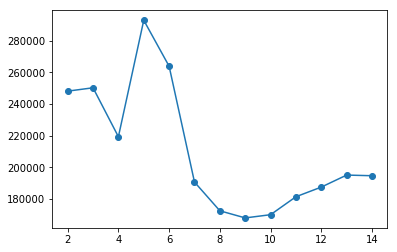

In [15]:
#On utilise présent la méthode des k plus proche voisins, on optimise le nombre de voisins à choisir en observant
#les performances de prédiction pour chaque modèle
# On prend toujours en entrée deux features

errors = []
for i in range(2,15):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(xtrain,ytrain)
    errors.append(mean_squared_error(ytest,neigh.predict(xtest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

#le minimum est atteint pour 9 voisins

In [16]:
#On s'intéresse donc in fine à la performance d'un knn à 9 voisins

neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(xtrain,ytrain)
yhat = neigh.predict(xtest)
mean_squared_error(ytest,yhat)

### On obtien une MSE de 167973, plus performant que la régression linéaire ###

167973.62003569832